# Exercises Week 2

## *For running this examples in the jupyter nootbook remember to change the path in SetFileName to the one in your pc with the wind_image.vti file

In [1]:
import vtk

reader = vtk.vtkRectilinearGridReader()
reader.SetFileName("C:/Users/Javier/Documents/Universidad/Intersemestral 7mo/Visual/Week 1/Scientific-Computing-Visualization/Excersises Week 2/data/jet4_0.500.vtk")

reader.Update()
output = reader.GetOutput()

xmi, xma, ymi, yma, zmi, zma = output.GetBounds()

# Color Transfer Function and LookUpTable
# Create transfer mapping scalar value to color
#
#
#
#

#tableSize = 30
#
#lut = vtk.vtkLookupTable()
#lut.SetNumberOfTableValues(tableSize)
#lut.Build()
#
#for i in range(0,tableSize):
#    rgb = list(colorTransferFunction.GetColor(float(i)/tableSize))+[0.5]
#    lut.SetTableValue(i,rgb)
        

# A plane for the seeds
plane = vtk.vtkPlaneSource()
plane.SetOrigin(0, 0, 0)
plane.SetPoint1(xma, 0, 0)
plane.SetPoint2(0, 0, zma)
plane.SetXResolution(20)
plane.SetYResolution(20)

# Add the outline of the plane
outline = vtk.vtkOutlineFilter()
outline.SetInputData(plane.GetOutput())
outlineMapper = vtk.vtkPolyDataMapper()
outlineMapper.SetInputConnection(outline.GetOutputPort())
outlineActor = vtk.vtkActor()
outlineActor.SetMapper(outlineMapper)
outlineActor.GetProperty().SetColor(1,1,1)

# Compute streamlines
streamline = vtk.vtkStreamTracer()
streamline.SetSourceConnection(plane.GetOutputPort())
streamline.SetInputConnection(reader.GetOutputPort())
# Try different integration alternatives! See the documentation of vtkStreamTracer
streamline.SetIntegrationDirectionToForward()
streamline.SetMaximumPropagation(1)
streamline.SetComputeVorticity(True)

# Pass the streamlines to the mapper
streamlineMapper = vtk.vtkPolyDataMapper()
#streamlineMapper.SetLookupTable(lut)
streamlineMapper.SetInputConnection(streamline.GetOutputPort())
streamlineMapper.SetScalarVisibility(True)
streamlineMapper.SetScalarModeToUsePointFieldData()
streamlineMapper.SelectColorArray('vectors')
# See documentation for the parameter in GetRange()
# http://www.vtk.org/doc/nightly/html/classvtkDataArray.html#ab7efccf59d099c038a4ae269a490e1a3
streamlineMapper.SetScalarRange((reader.GetOutput().GetPointData().GetVectors().GetRange(-1)))

# Pass the mapper to the actor
streamlineActor = vtk.vtkActor()
streamlineActor.SetMapper(streamlineMapper)
streamlineActor.GetProperty().SetLineWidth(2.0)

# Add the outline of the data set
#
#
#
#
#

# Rendering / Window
renderer = vtk.vtkRenderer()
renderer.SetBackground(0.0, 0.0, 0.0)
renderer.AddActor(streamlineActor)
renderer.AddActor(outlineActor)
#renderer.AddActor(gOutlineActor)

renderWindow = vtk.vtkRenderWindow()
renderWindow.AddRenderer(renderer)
renderWindow.SetSize(500, 500)
renderWindow.Render()

interactor = vtk.vtkRenderWindowInteractor()
interactor.SetInteractorStyle(vtk.vtkInteractorStyleTrackballCamera())
interactor.SetRenderWindow(renderWindow)
interactor.Initialize()
interactor.Start()

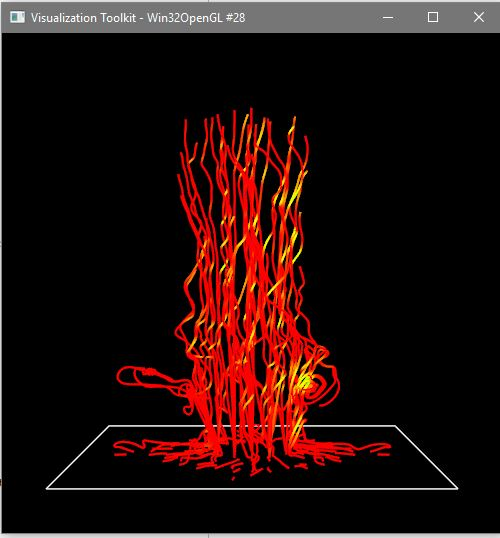

### Script completed
#### The SetMaximumPropagation is on 5 and it seems to be the maximum value that changes the image 

In [ ]:
import vtk

reader = vtk.vtkRectilinearGridReader()
reader.SetFileName("C:/Users/Javier/Documents/Universidad/Intersemestral 7mo/Visual/Week 1/Scientific-Computing-Visualization/Excersises Week 2/data/jet4_0.500.vtk")

reader.Update()
output = reader.GetOutput()

xmi, xma, ymi, yma, zmi, zma = output.GetBounds()

# Color Transfer Function and LookUpTable
# Create transfer mapping scalar value to color
#BOUNDS (0.0, 0.9921240210533142, 0.0, 1.9920599460601807, 0.0, 0.9921240210533142)
#RGB: 226, 88, 34 for fire
print(output.GetBounds())
colorTransferFunction = vtk.vtkColorTransferFunction()
colorTransferFunction.AddRGBPoint(0.0, 1.0, 0.8, 0.0)
colorTransferFunction.AddRGBPoint(0.03, 255/255, 100/255, 45/255)
colorTransferFunction.AddRGBPoint(0.3, 250/255, 95/255, 40//255)
colorTransferFunction.AddRGBPoint(0.9, 250/255, 90/255, 34/255)
colorTransferFunction.AddRGBPoint(1.3, 226/255, 88/255, 34//255)
colorTransferFunction.AddRGBPoint(1.9, 0.7, 0.0,0.0)



tableSize = 30

lut = vtk.vtkLookupTable()
lut.SetNumberOfTableValues(tableSize)
lut.Build()

for i in range(0,tableSize):
    rgb = list(colorTransferFunction.GetColor(float(i)/tableSize))+[0.5]
    lut.SetTableValue(i,rgb)
        

# A plane for the seeds
plane = vtk.vtkPlaneSource()
plane.SetOrigin(0, 0, 0)
plane.SetPoint1(xma, 0, 0)
plane.SetPoint2(0, 0, zma)
plane.SetXResolution(20)
plane.SetYResolution(20)

# Add the outline of the plane
outline = vtk.vtkOutlineFilter()
outline.SetInputData(plane.GetOutput())
outlineMapper = vtk.vtkPolyDataMapper()
outlineMapper.SetInputConnection(outline.GetOutputPort())
outlineActor = vtk.vtkActor()
outlineActor.SetMapper(outlineMapper)
outlineActor.GetProperty().SetColor(1,1,1)

# Compute streamlines
streamline = vtk.vtkStreamTracer()
streamline.SetSourceConnection(plane.GetOutputPort())
streamline.SetInputConnection(reader.GetOutputPort())
# Try different integration alternatives! See the documentation of vtkStreamTracer
streamline.SetIntegrationDirectionToForward()
streamline.SetMaximumPropagation(5)
streamline.SetComputeVorticity(True)

# Pass the streamlines to the mapper
streamlineMapper = vtk.vtkPolyDataMapper()
streamlineMapper.SetLookupTable(lut)
streamlineMapper.SetInputConnection(streamline.GetOutputPort())
streamlineMapper.SetScalarVisibility(True)
streamlineMapper.SetScalarModeToUsePointFieldData()
streamlineMapper.SelectColorArray('vectors')
# See documentation for the parameter in GetRange()
# http://www.vtk.org/doc/nightly/html/classvtkDataArray.html#ab7efccf59d099c038a4ae269a490e1a3
streamlineMapper.SetScalarRange((reader.GetOutput().GetPointData().GetVectors().GetRange(-1)))

# Pass the mapper to the actor
streamlineActor = vtk.vtkActor()
streamlineActor.SetMapper(streamlineMapper)
streamlineActor.GetProperty().SetLineWidth(2.0)

# Add the outline of the data set
Outline = vtk.vtkRectilinearGridOutlineFilter()
Outline.SetInputData(output)
# Outline Mappper to the figure
OutlineMapper = vtk.vtkPolyDataMapper()
OutlineMapper.SetInputConnection(Outline.GetOutputPort())
# The Actor
gOutlineActor = vtk.vtkActor()
gOutlineActor.SetMapper(OutlineMapper)

# Rendering / Window
renderer = vtk.vtkRenderer()
renderer.SetBackground(0.1, 0.1, 0.1)
renderer.AddActor(streamlineActor)
renderer.AddActor(outlineActor)
renderer.AddActor(gOutlineActor)

renderWindow = vtk.vtkRenderWindow()
renderWindow.AddRenderer(renderer)
renderWindow.SetSize(500, 500)
renderWindow.Render()

interactor = vtk.vtkRenderWindowInteractor()
interactor.SetInteractorStyle(vtk.vtkInteractorStyleTrackballCamera())
interactor.SetRenderWindow(renderWindow)
interactor.Initialize()
interactor.Start()

### Result

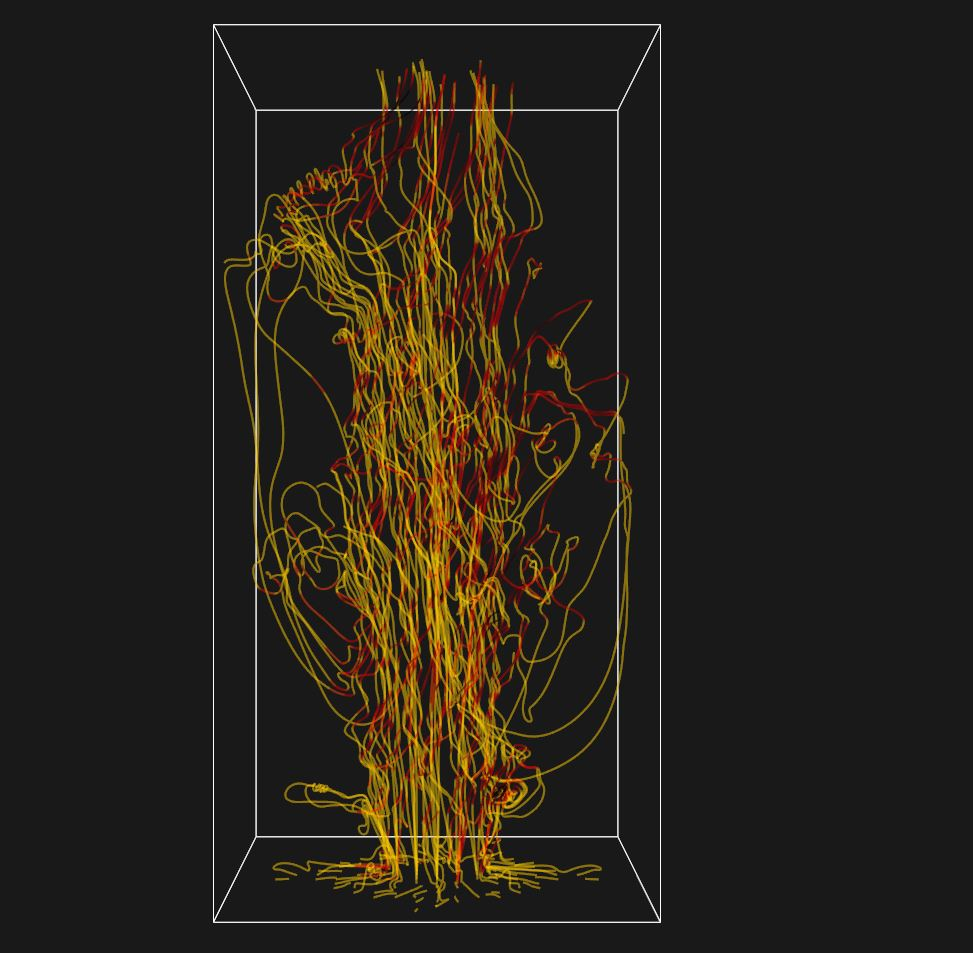

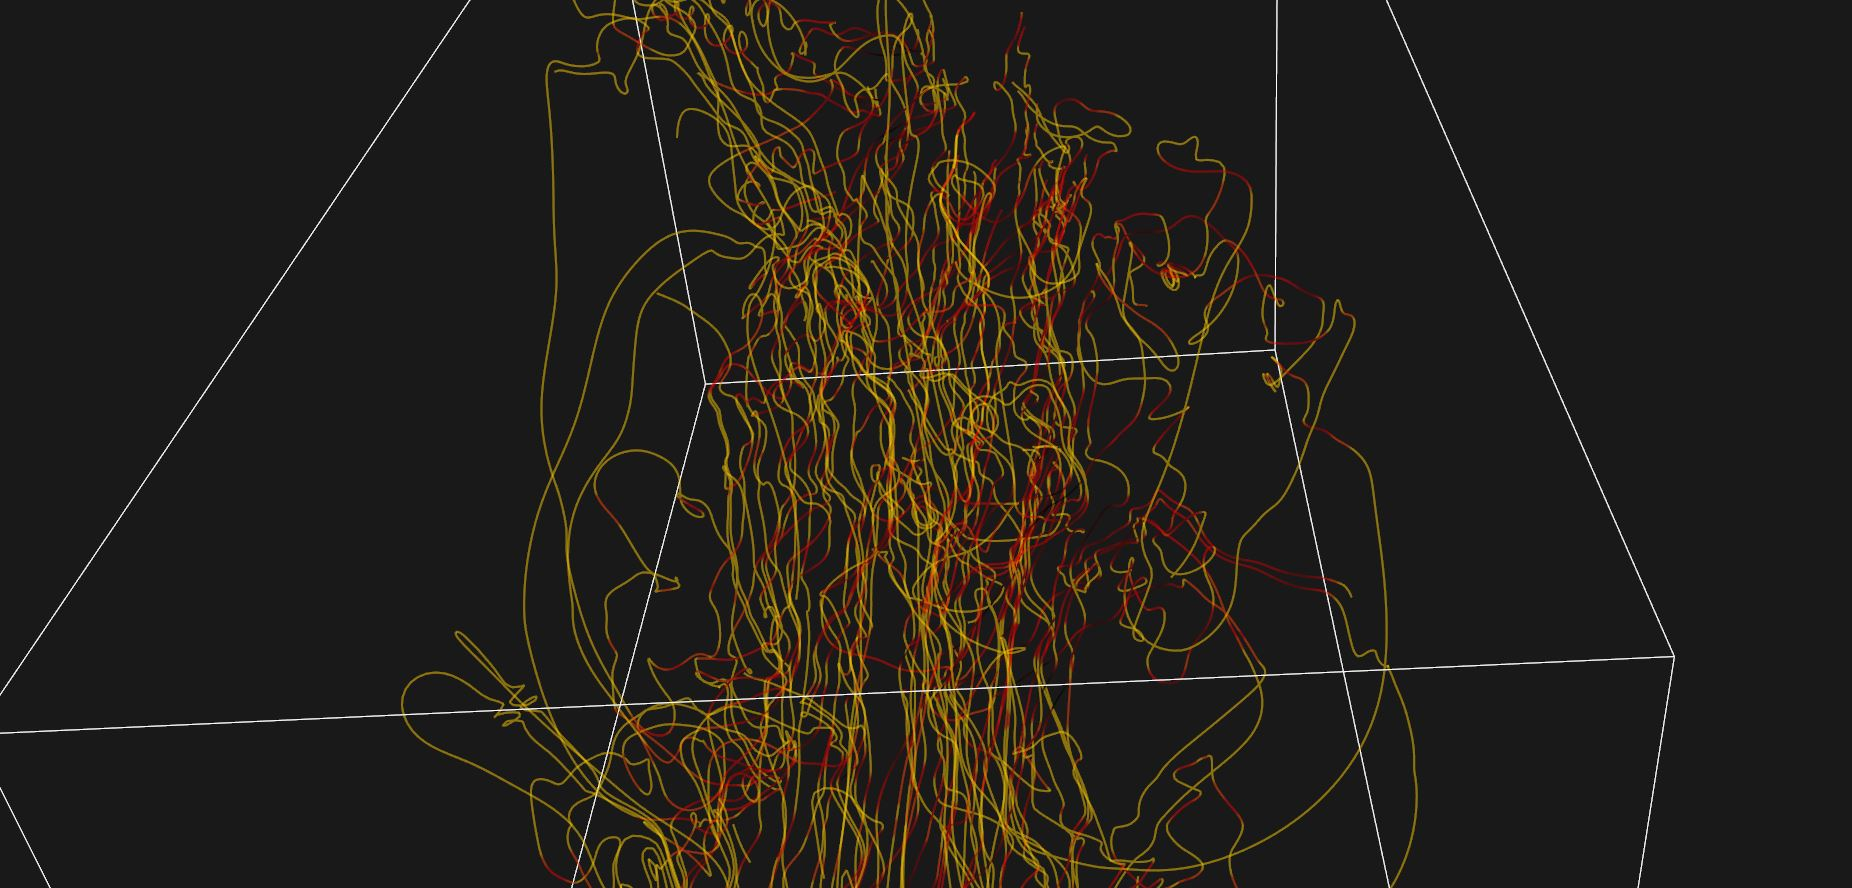

### I create a Color Transfer Function and LookUpTable and also added the gOutlineActor for the outline that surround the figure. Since the figure originally is using the yellow and orange, it try to replicate that combination but adding a little bit of red for making clear the area that are red, since there are parts of the figure that are darker than those, they are highlighted with a darker red

## Wind data set exploration

### One Approach is showing only the magnitude from vector of wind velocity and create a contour around it for marking where are the highest values.

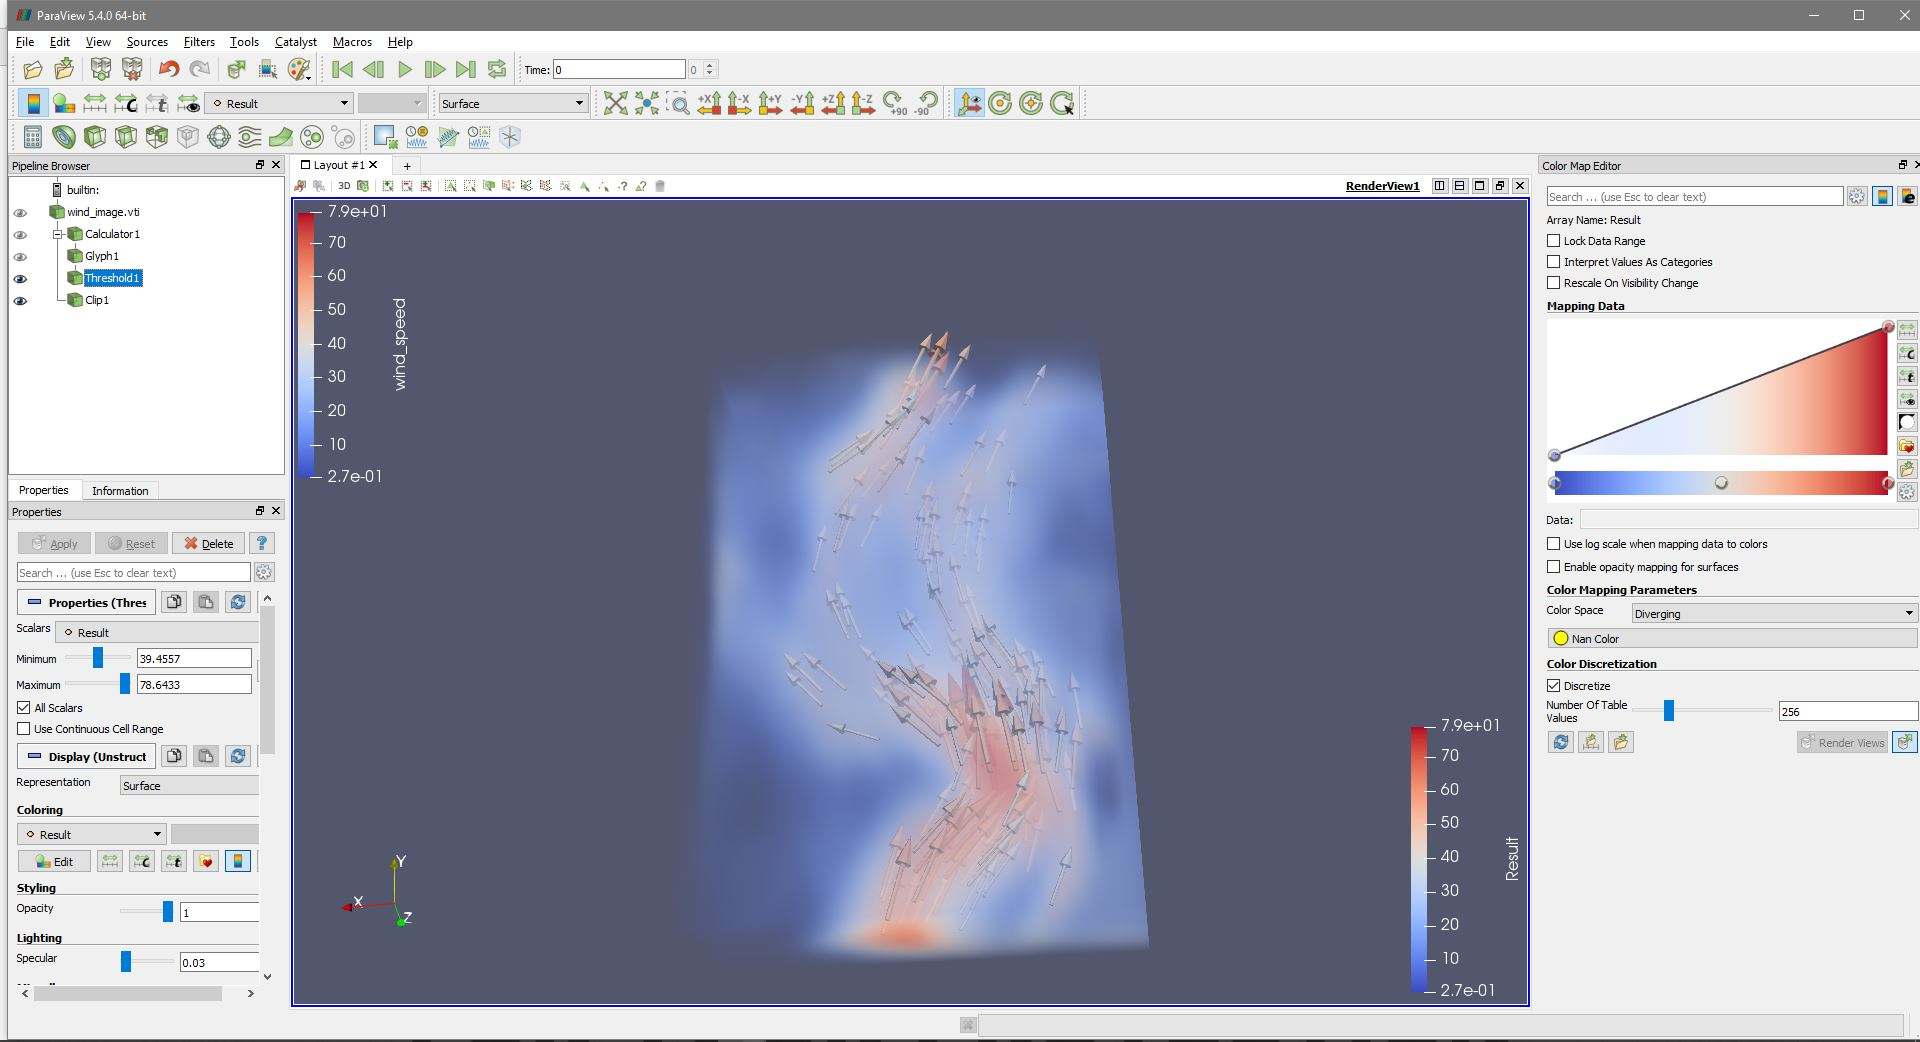

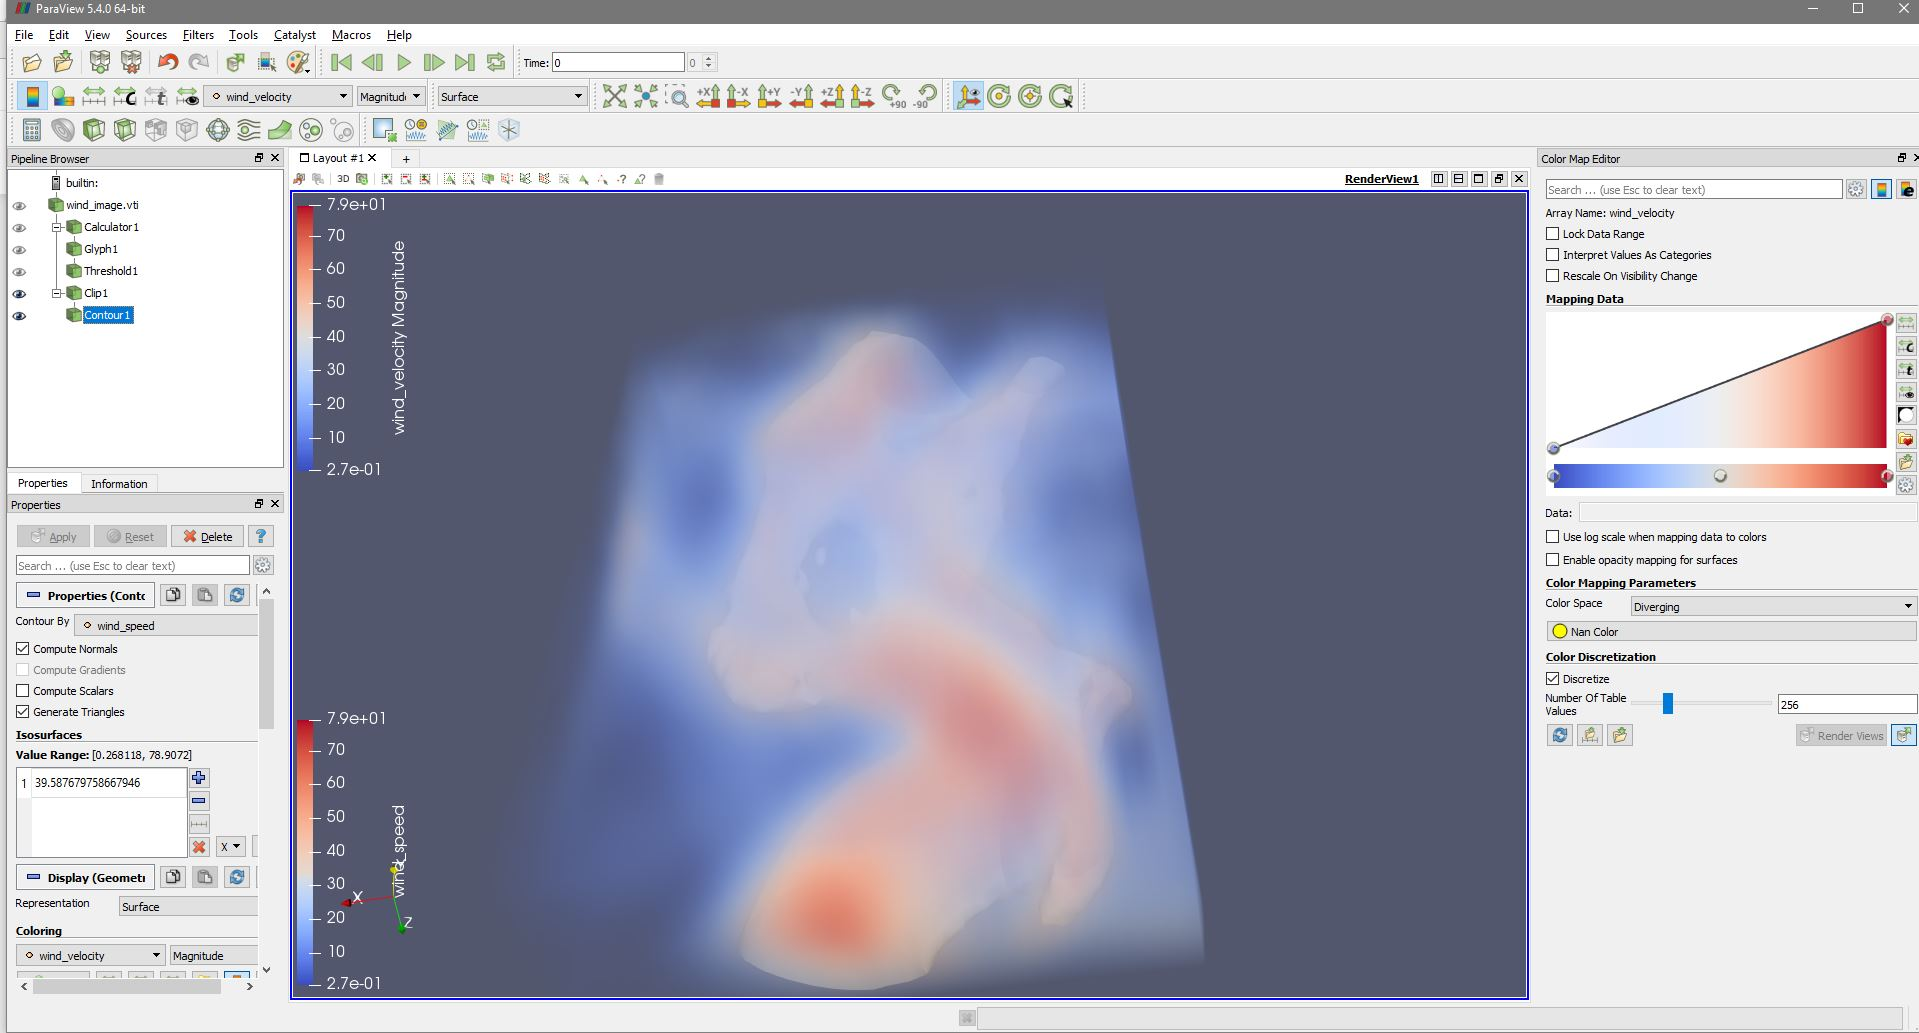

### Other possible approach is make a point volume interpolation in order to get a clear image from the threshold and get an object with volume. For a clearer image, I apply a Color Transfer Function that marks the dense volume with the highest wind speed magnitude

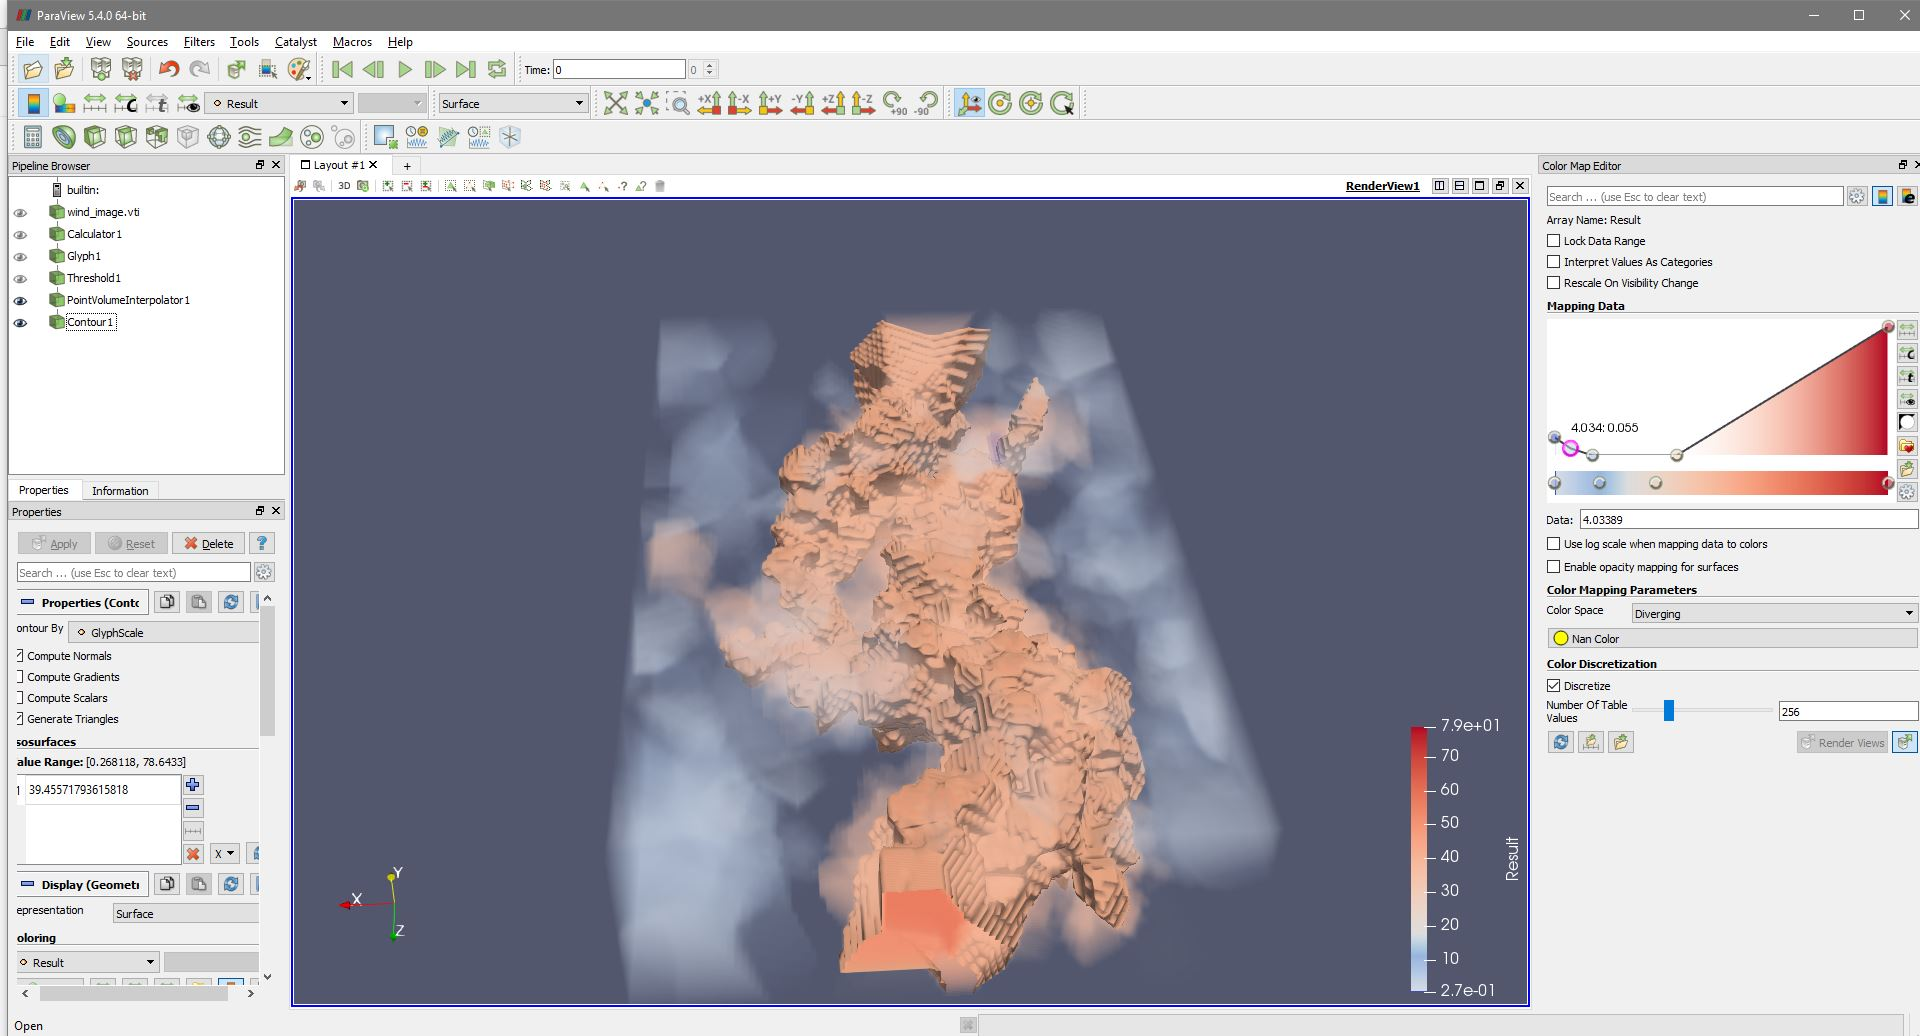

### In this case this image show that in the center of the dataset is a high-density area the vector more specific in the orange area that appears in the image. 